In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from plotly import express as plo
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
pl.style.use('seaborn-whitegrid')

In [4]:
train=pd.read_csv('/Users/rissu/Downloads/Compressed/drive-download-20200502T100031Z-001/train_V2.csv')
test=pd.read_csv('/Users/rissu/Downloads/Compressed/drive-download-20200502T100031Z-001/test_V2.csv')

In [5]:
train.shape,test.shape

((4446966, 29), (1934174, 28))

In [6]:
train.head(3).T

,0,1,2
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae
assists,0,0,1
boosts,0,0,0
damageDealt,0,91.47,68
DBNOs,0,0,0
headshotKills,0,0,0
heals,0,0,0
killPlace,60,57,47


In [7]:
test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [8]:
train['Id'].nunique(),train['groupId'].nunique(),train['matchId'].nunique()

(4446966, 2026745, 47965)

In [ ]:
train.groupby('matchId')['matchType']

In [11]:
train.groupby('matchId')['matchId'].count()

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
                 ... 
fffd74b5150cb4     97
fffe53015be300     97
fffe562611d981     94
fffe721f841f85     97
fffe92232706aa     93
Name: matchId, Length: 47965, dtype: int64

In [62]:
a=train.groupby('matchType')['matchType'].count()

In [63]:
a=a.sort_values(ascending=True)

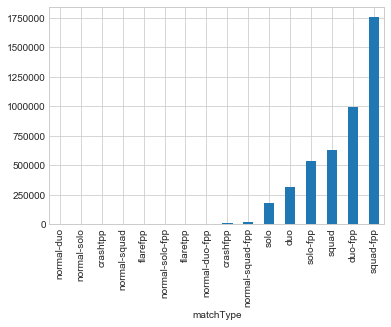

In [64]:
a.plot.bar()

In [57]:
a=a[[2,12,14]]

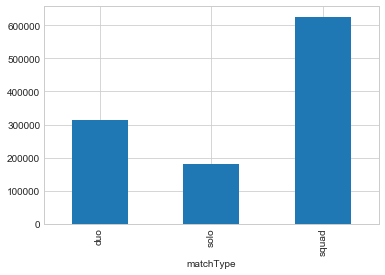

In [61]:
a.plot(kind='bar')
pl.show()

In [68]:
a=[1,2,3,4,5]
b=[6,7,8,9,10]

In [115]:
match=train.groupby('matchType')['matchId'].size().to_frame('players in match')
group=train.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')


In [116]:
def mergelist(list1,list2):
    return list(itertools.product(list1,list2))

In [170]:
pd.concat([match.groupby('matchType').describe()[mergelist(['players in match'],['min','max','mean'])],
           group.groupby('matchType').describe()[mergelist(['players in group'],['min','max','mean'])]],axis=1)
           

players in match                       players in group  \
                              min        max       mean              min   
matchType                                                                  
crashfpp                   6287.0     6287.0     6287.0              1.0   
crashtpp                    371.0      371.0      371.0              1.0   
duo                      313591.0   313591.0   313591.0              1.0   
duo-fpp                  996691.0   996691.0   996691.0              1.0   
flarefpp                    718.0      718.0      718.0              1.0   
flaretpp                   2505.0     2505.0     2505.0              1.0   
normal-duo                  199.0      199.0      199.0              1.0   
normal-duo-fpp             5489.0     5489.0     5489.0              1.0   
normal-solo                 326.0      326.0      326.0              1.0   
normal-solo-fpp            1682.0     1682.0     1682.0              1.0   
normal-squad                516.0      516.0      516.0              1.0   
normal-squad-fpp          17174.0    17174.0    17174.0              1.0   
solo                     181943.0   181943.0   181943.0              1.0   
solo-fpp                 536762.0   536762.0   536762.0              1.0   
squad                    626526.0   626526.0   626526.0              1.0   
squad-fpp               1756186.0  1756186.0  1756186.0              1.0   

                                  
                   max      mean  
matchType                         
crashfpp          10.0  2.008626  
crashtpp           7.0  2.061111  
duo               16.0  2.058710  
duo-fpp           72.0  2.048735  
flarefpp          17.0  3.590000  
flaretpp          18.0  3.604317  
normal-duo         5.0  1.970297  
normal-duo-fpp     7.0  1.949911  
normal-solo        7.0  1.405172  
normal-solo-fpp   10.0  1.370823  
normal-squad      10.0  4.161290  
normal-squad-fpp  74.0  4.347848  
solo              21.0  1.079287  
solo-fpp          64.0  1.025416  
squad             28.0  3.538096  
squad-fpp         31.0  3.469619

In [172]:
a=match.groupby('matchType').describe()


In [177]:
a.columns=a.columns.get_level_values(1)

In [184]:
a=a.reset_index()

In [210]:
a=a[['matchType','min','max','mean']]

In [230]:
a=a.loc[[2,12,14]]

In [ ]:
corr=train.corr()
f,ax=pl.subplots(figsize=(20,15))
sns.heatmap(corr,ax=ax,annot=True,fmt='.1f',cmap='BrBG')